# Preparing Image data for Machien Learning

- Representing Image as feature vectors
- Single channel and multi channel image data
- Extracting patches from images
- Learning sparse codings using dictionary learning
- Reconstruct images from patches
-  Representing images using connectivity graphs

A pixel is represented by 3 values between 0 and 255 (RGB) - 3 channel  image

grey scale, 1 value - 1 channel

Images are 3D matricies, grey scale (6,6,1) and rgb (6,6,3)

list of images - 4D matrix, extra dimension refers to the number of images



- Dictionary Learning - Representation learning method to find a sparse representation of input data, often used in denoising of images.
- Noise - random variations in images due to lighthing variations, camera eletronics, surface reflectance and lens.
- Denoising - Process of removing noise from images, usually through the use of filters. Sparce codings from dictionary learning can alse be used for denoising



## Dictionary Learning for Image Denoising
- Corpus of clean images (free of noise) are feed into the dictionary learner
- Express clean images in terms of atoms (sparce codings), each image is a linear combination of atoms
- Choose transformation algorithm (orthogonal matching pursuit, lars,...)
- Apply transformation algorithm to new noisy images, atoms from clean images are used to reconstrct the noisy images.

Solvers:
- Thresholding: fast but innacurate
- Orthogonal Matching Pursuit OMP: most accurate and unbiased
- Least-angle regression
- Lasso regression

## Image Descriptor

- General Information
    - Location
    - Color
    - Shape
    - Texture
- Specific Information
    - Faces
    - places or Landmarks

SIFT - scale invariant feature transform

DAISY - similar to sift, but faster and with lower dimensionality feature vectors

### Patch extraction
- Extract patches from images
- could be 2D or 3D
- can rebuild image from patches

### Connectivity graph
- Extract connectivity information 
- widly used as a building block in more advanced techniques discussed above
- help identify contiguous patches in images for clustering operations
- grid_to_graph return a matrix given shape of image: 
    - identifies pixel to pixel connectivity of images
- img_to_graph returns matrix from 2D or 3D image: 
    - identifies pixel to pixel gradient connections
    - directional chnage in the itensity or color of an image
    - edges are weighed with gradient values

## Dictionary Learning to Denoise images

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.feature_extraction.image import extract_patches_2d, reconstruct_from_patches_2d

In [2]:
from skimage import color
from skimage import io

In [3]:
color_img = io.imread('02/demos/datasets/koala.jpg')

<function matplotlib.pyplot.show(close=None, block=None)>

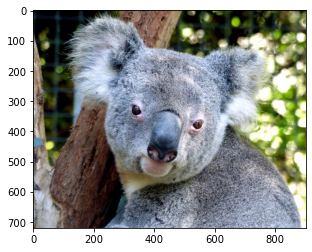

In [4]:
plt.imshow(color_img, cmap=plt.cm.gray)

plt.show()

In [5]:
img = color.rgb2gray(color_img)

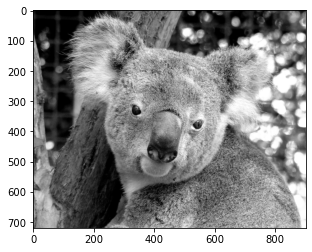

In [6]:
plt.imshow(img, cmap=plt.cm.gray)

plt.show()

In [8]:
img.shape

(720, 902)

In [9]:
height, width = img.shape

In [10]:
distorted_img = img.copy()

In [11]:
distorted_img

array([[0.23508667, 0.18607843, 0.11410627, ..., 0.12523961, 0.15800392,
        0.20645451],
       [0.26645922, 0.19587098, 0.10961137, ..., 0.11683098, 0.15351686,
        0.20477294],
       [0.25664392, 0.18802784, 0.1056898 , ..., 0.14175216, 0.17116039,
        0.20420745],
       ...,
       [0.2650498 , 0.24797961, 0.30736863, ..., 0.99438902, 0.99438902,
        0.99438902],
       [0.22191255, 0.21546824, 0.25638824, ..., 0.99438902, 0.99438902,
        0.99438902],
       [0.19446157, 0.19193882, 0.19364314, ..., 0.99438902, 0.99438902,
        0.99438902]])

In [13]:
distortion = 0.075 * np.random.randn(height, width //2)
distortion.shape

(720, 451)

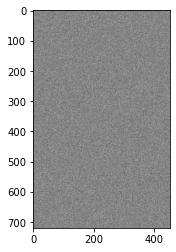

In [14]:
plt.imshow(distortion, cmap=plt.cm.gray)

plt.show()

In [15]:
distorted_img[:,width//2:] += distortion

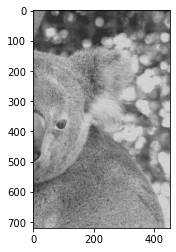

In [16]:
plt.imshow(distorted_img[:, width//2:], cmap=plt.cm.gray)
plt.show()

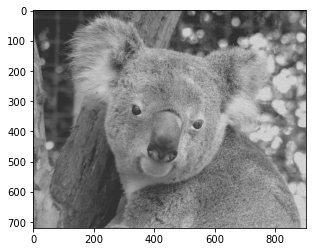

In [17]:
plt.imshow(distorted_img, cmap=plt.cm.gray)
plt.show()

In [18]:
patch_size = (7,7)
data = extract_patches_2d(distorted_img[:, :width//2], patch_size)

In [19]:
data.shape

(317730, 7, 7)

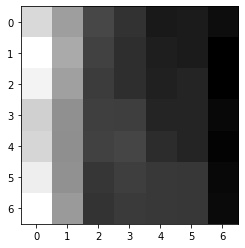

In [20]:
plt.imshow(data[0], cmap=plt.cm.gray)
plt.show()

In [21]:
data = data.reshape(data.shape[0],-1)

In [22]:
d_learning = MiniBatchDictionaryLearning(n_components=100, alpha=1, n_iter=1000)

components = d_learning.fit(data).components_

components

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_dict_learning.py:2290: FutureWarning: The default value of batch_size will change from 3 to 256 in 1.3.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(


array([[ 0.14870537,  0.14572204,  0.14180289, ...,  0.1432049 ,
         0.14008196,  0.13723978],
       [ 0.10275518,  0.16184871,  0.11116402, ...,  0.12345417,
         0.08288534,  0.06829144],
       [-0.16340835, -0.16897787, -0.16843525, ..., -0.11576364,
        -0.12521662, -0.13954752],
       ...,
       [ 0.1810289 ,  0.13042967,  0.09268607, ...,  0.13622948,
         0.18165185,  0.21777198],
       [ 0.10699549,  0.14983723,  0.11530434, ...,  0.13355658,
         0.19695171,  0.1833635 ],
       [ 0.04864616,  0.10166231,  0.15198176, ...,  0.00664528,
        -0.01818393, -0.0092233 ]])

In [23]:
components.shape

(100, 49)

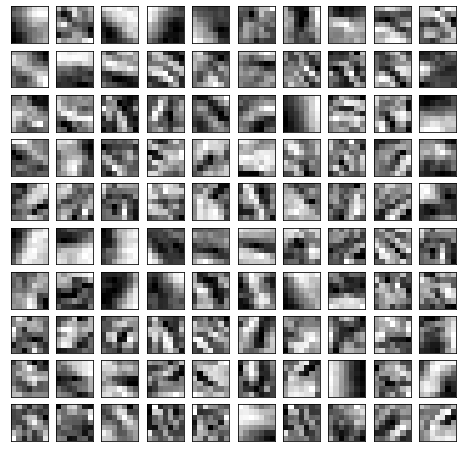

In [24]:
plt.figure( figsize=(8,8))

for i, comp in enumerate(components):
    plt.subplot(10, 10, i+1)
    plt.imshow(comp.reshape(patch_size),
               cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())

plt.show()

In [25]:
right_data = extract_patches_2d(distorted_img[:, width//2:], patch_size)

In [26]:
right_data = right_data.reshape(right_data.shape[0],-1)
right_data.shape

(317730, 49)

In [27]:
d_learning.set_params(transform_n_nonzero_coefs = 1, transform_algorithm='lars')

MiniBatchDictionaryLearning(n_components=100, n_iter=1000,
                            transform_algorithm='lars',
                            transform_n_nonzero_coefs=1)

In [28]:
code = d_learning.transform(right_data)

In [29]:
print('Shape of code: ', code.shape)
print('Shape of components: ', components.shape)

Shape of code:  (317730, 100)
Shape of components:  (100, 49)


In [30]:
patches = np.dot(code,components)
patches.shape

(317730, 49)

In [31]:
patches = patches.reshape(len(right_data), *patch_size)
patches.shape

(317730, 7, 7)

In [32]:
reconstructed_img = img.copy()

In [34]:
reconstructed_img[:, width//2:] = reconstruct_from_patches_2d(patches, (height, width//2))

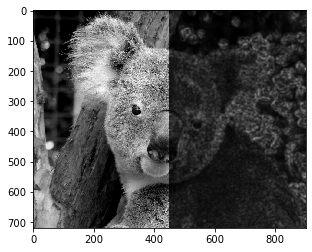

In [35]:
plt.imshow(reconstructed_img,
           vmin=0,
           vmax=1,
           cmap=plt.cm.gray,
           interpolation='nearest')
plt.show()

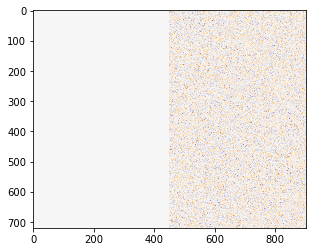

In [36]:
difference = img-distorted_img
plt.imshow(difference,
           vmin=-0.5,
           vmax=0.5,
           cmap=plt.cm.PuOr,
           interpolation='nearest')
plt.show()

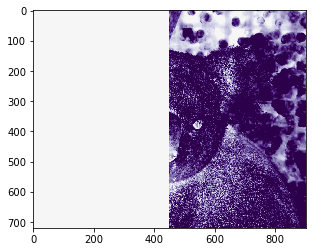

In [37]:
difference = img-reconstructed_img
plt.imshow(difference,
           vmin=-0.5,
           vmax=0.5,
           cmap=plt.cm.PuOr,
           interpolation='nearest')
plt.show()

In [39]:
d_learning.set_params(transform_n_nonzero_coefs=1,
                      transform_algorithm='omp')

MiniBatchDictionaryLearning(n_components=100, n_iter=1000,
                            transform_n_nonzero_coefs=1)

In [40]:
code = d_learning.transform(right_data)

In [41]:
print('Shape of code: ', code.shape)
print('Shape of components: ', components.shape)

Shape of code:  (317730, 100)
Shape of components:  (100, 49)


In [42]:
patches = np.dot(code,components)
patches.shape

(317730, 49)

In [43]:
patches = patches.reshape(len(right_data), *patch_size)
patches.shape

(317730, 7, 7)

In [44]:
reconstructed_img = img.copy()

In [45]:
reconstructed_img[:, width//2:] = reconstruct_from_patches_2d(patches, (height, width//2))

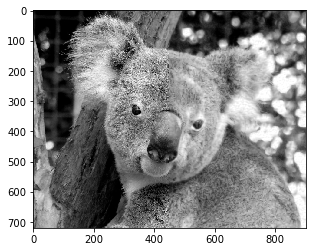

In [46]:
plt.imshow(reconstructed_img,
           vmin=0,
           vmax=1,
           cmap=plt.cm.gray,
           interpolation='nearest')
plt.show()

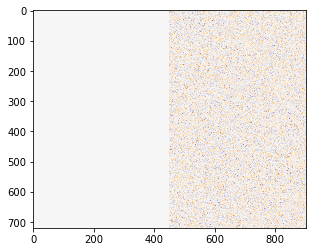

In [47]:
difference = img-distorted_img
plt.imshow(difference,
           vmin=-0.5,
           vmax=0.5,
           cmap=plt.cm.PuOr,
           interpolation='nearest')
plt.show()

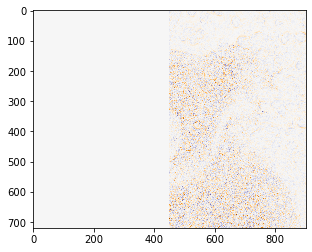

In [48]:
difference = img-reconstructed_img
plt.imshow(difference,
           vmin=-0.5,
           vmax=0.5,
           cmap=plt.cm.PuOr,
           interpolation='nearest')
plt.show()

 we can see the shape of a koala, so in denoisisng the image we also removed some important imformation

## Image feature extraction using a pixel-to-pixel connectivity graph

In [49]:
from skimage.data import coins
from sklearn.cluster import AgglomerativeClustering

from scipy.ndimage.filters import gaussian_filter
from skimage.transform import rescale

<ipython-input-49-8461af50ab30>:4: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [50]:
original_coins = coins()

In [51]:
original_coins.shape

(303, 384)

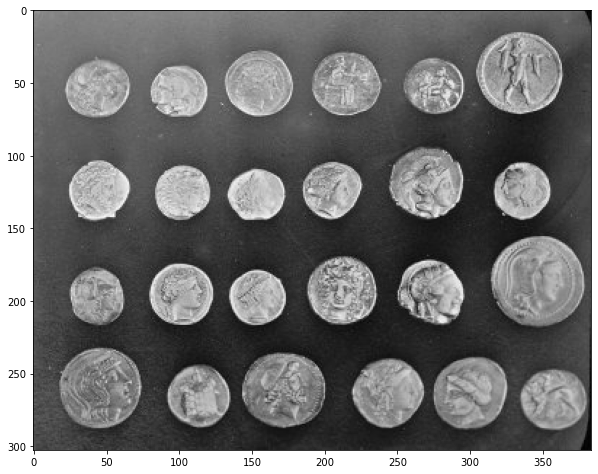

In [52]:
plt.figure(figsize=(10,20))
plt.imshow(original_coins, cmap=plt.cm.gray)
plt.show()

In [53]:
smoothened_coins = gaussian_filter(original_coins, sigma=2)

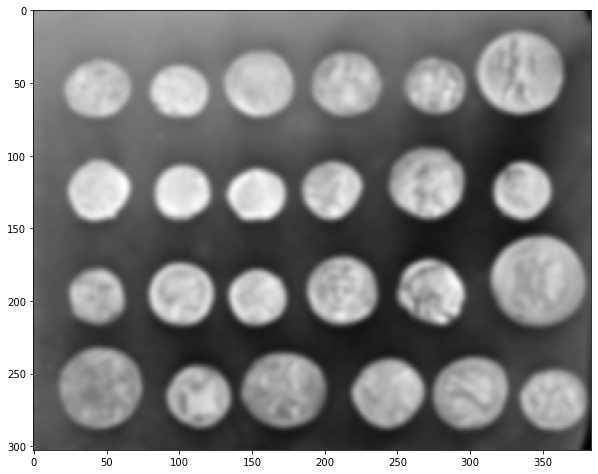

In [54]:
plt.figure(figsize=(10,20))
plt.imshow(smoothened_coins, cmap=plt.cm.gray)
plt.show()

In [55]:
rescaled_coins = rescale(smoothened_coins, 0.2,
                         mode = 'reflect',
                         multichannel = False,
                         anti_aliasing=False)

In [57]:
rescaled_coins.shape

(61, 77)

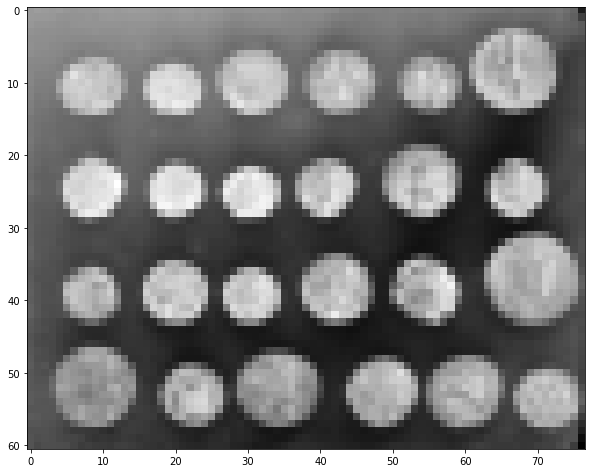

In [58]:
plt.figure(figsize=(10,20))
plt.imshow(rescaled_coins, cmap=plt.cm.gray)
plt.show()

In [59]:
X = np.reshape(rescaled_coins, (-1,1))
X.shape

(4697, 1)

In [60]:
from sklearn.feature_extraction import image

In [61]:
connectivity = image.grid_to_graph(*rescaled_coins.shape)
print(connectivity)

  (0, 1)	1
  (1, 2)	1
  (2, 3)	1
  (3, 4)	1
  (4, 5)	1
  (5, 6)	1
  (6, 7)	1
  (7, 8)	1
  (8, 9)	1
  (9, 10)	1
  (10, 11)	1
  (11, 12)	1
  (12, 13)	1
  (13, 14)	1
  (14, 15)	1
  (15, 16)	1
  (16, 17)	1
  (17, 18)	1
  (18, 19)	1
  (19, 20)	1
  (20, 21)	1
  (21, 22)	1
  (22, 23)	1
  (23, 24)	1
  (24, 25)	1
  :	:
  (4672, 4672)	1
  (4673, 4673)	1
  (4674, 4674)	1
  (4675, 4675)	1
  (4676, 4676)	1
  (4677, 4677)	1
  (4678, 4678)	1
  (4679, 4679)	1
  (4680, 4680)	1
  (4681, 4681)	1
  (4682, 4682)	1
  (4683, 4683)	1
  (4684, 4684)	1
  (4685, 4685)	1
  (4686, 4686)	1
  (4687, 4687)	1
  (4688, 4688)	1
  (4689, 4689)	1
  (4690, 4690)	1
  (4691, 4691)	1
  (4692, 4692)	1
  (4693, 4693)	1
  (4694, 4694)	1
  (4695, 4695)	1
  (4696, 4696)	1


In [62]:
connectivity.shape

(4697, 4697)

In [63]:
connectivity.toarray()

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [68]:
n_clusters = 25
agglo = AgglomerativeClustering(n_clusters=n_clusters, connectivity=connectivity)
agglo.fit(X)

AgglomerativeClustering(connectivity=<4697x4697 sparse matrix of type '<class 'numpy.int32'>'
	with 23209 stored elements in COOrdinate format>,
                        n_clusters=25)

In [69]:
label = np.reshape(agglo.labels_, rescaled_coins.shape)
label

array([[0, 0, 0, ..., 0, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=int64)

In [70]:
label.shape

(61, 77)

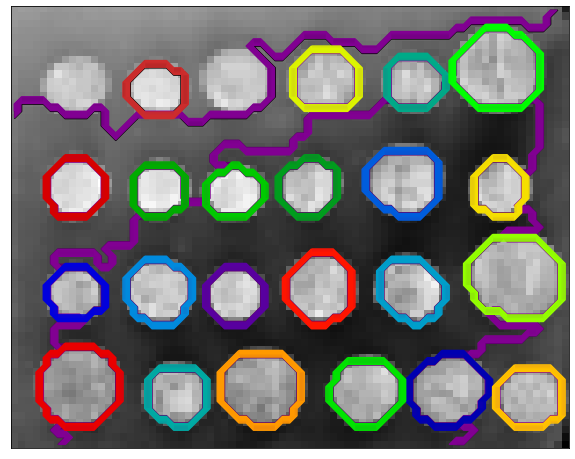

In [84]:
plt.figure(figsize=(10,20))
plt.imshow(rescaled_coins, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label == l, colors=[plt.cm.nipy_spectral(l / float(n_clusters)), ])


plt.xticks(())
plt.yticks(())
plt.show()

In [73]:
label

array([[0, 0, 0, ..., 0, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=int64)

## Image feature extraction using a pixel-to-pixel gradient conenctivity graph

In [3]:
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

In [4]:
l = 100

x,y = np.indices((l,l))

In [5]:
x

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 2,  2,  2, ...,  2,  2,  2],
       ...,
       [97, 97, 97, ..., 97, 97, 97],
       [98, 98, 98, ..., 98, 98, 98],
       [99, 99, 99, ..., 99, 99, 99]])

In [6]:
y

array([[ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       ...,
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99]])

In [7]:
center1 = (28,24)
center2 = (40,50)
center3 = (67,58)
center4 = (24,70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

In [8]:
circle1 = (x-center1[0])**2 + (y-center1[1])**2 < radius1**2
circle2 = (x-center2[0])**2 + (y-center2[1])**2 < radius2**2
circle3 = (x-center3[0])**2 + (y-center3[1])**2 < radius3**2
circle4 = (x-center4[0])**2 + (y-center4[1])**2 < radius4**2

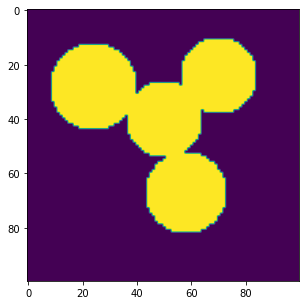

In [9]:
img = circle1 + circle2 + circle3 + circle4

plt.figure(figsize=(10,5))
plt.imshow(img)

plt.show()

In [10]:
mask = img.astype(bool)
img = img.astype(float)
mask.shape, img.shape

((100, 100), (100, 100))

In [11]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [12]:
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

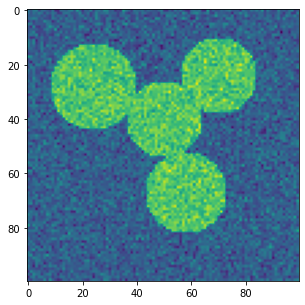

In [13]:
img += 1+0.2*np.random.randn(*img.shape)

plt.figure(figsize=(10,5))
plt.imshow(img)

plt.show()

In [14]:
graph = image.img_to_graph(img, mask=mask)
print(graph)

  (0, 1)	0.10724958048336353
  (1, 2)	0.20175632750336847
  (2, 3)	0.1989867355708217
  (3, 4)	0.08972041318455437
  (4, 5)	0.6256149830635906
  (5, 6)	0.2898945070183434
  (6, 7)	0.15016955261109421
  (7, 8)	0.05491158074527225
  (8, 9)	0.1131811728392158
  (9, 10)	0.0211711487716022
  (11, 12)	0.49413130506131964
  (12, 13)	0.07051238406642746
  (13, 14)	0.048646566576062256
  (14, 15)	0.21050630651722724
  (15, 16)	0.3348169416275739
  (16, 17)	0.06476049886311075
  (17, 18)	0.3042066948396691
  (18, 19)	0.34795457383127504
  (19, 20)	0.09907142849835204
  (20, 21)	0.09821688373013515
  (21, 22)	0.07673713682426131
  (22, 23)	0.21665468979109792
  (23, 24)	0.36123203881539157
  (24, 25)	0.23619243936815915
  (26, 27)	0.02854567811796027
  :	:
  (2653, 2653)	2.1570437414231995
  (2654, 2654)	2.137396372084058
  (2655, 2655)	2.118632468634716
  (2656, 2656)	1.9862176558758216
  (2657, 2657)	2.125311791007576
  (2658, 2658)	2.0753165624911922
  (2659, 2659)	2.0768498141272373
  (2660, 

In [15]:
graph.shape

(2678, 2678)

In [16]:
graph.data

array([0.10724958, 0.20175633, 0.19898674, ..., 2.13641237, 1.97194554,
       2.00341632])

In [17]:
labels = spectral_clustering(graph, n_clusters=4)


In [18]:
labels

array([3, 3, 3, ..., 2, 2, 2])

In [19]:
label_im = -np.ones(img.shape)
label_im

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [20]:
label_im[mask] = labels
label_im[mask]

array([3., 3., 3., ..., 2., 2., 2.])

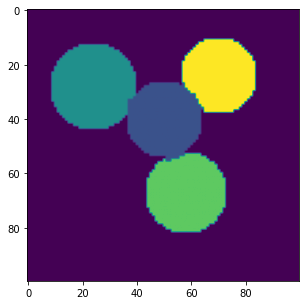

In [21]:
plt.figure(figsize=(10, 5))
plt.imshow(label_im)

plt.show()